# Covid-19 Data Analysis in India (End of Jan,2020 to First of Aug, 2021)

## Importing libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Taking Data -> Source https://www.kaggle.com/datasets/sudalairajkumar/covid19-in-india?select=covid_19_india.csv

In [2]:
df = pd.read_csv('./data/covid_19_india.csv')
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


## Explore Data

In [3]:
df.info() ## Very important note their is no null values in the whole df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [4]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [5]:
df.shape

(18110, 9)

## Cleaning and managing data

### Date conversion

In [6]:
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       18110 non-null  int64         
 1   Date                      18110 non-null  datetime64[ns]
 2   Time                      18110 non-null  object        
 3   State/UnionTerritory      18110 non-null  object        
 4   ConfirmedIndianNational   18110 non-null  object        
 5   ConfirmedForeignNational  18110 non-null  object        
 6   Cured                     18110 non-null  int64         
 7   Deaths                    18110 non-null  int64         
 8   Confirmed                 18110 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.2+ MB


### Add year-month col

In [7]:
df['year-month'] = df.Date.map(lambda x: x.strftime('%Y-%m'))

## Questions

### Q1. Trend of total (national + foreign) cases and deaths in India

In [8]:
df.head(3)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,year-month
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,2020-01
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,2020-01
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2020-02


In [9]:
total_confirm_cases_date_wise = df.groupby('Date')['Confirmed'].sum()

In [10]:
total_confirm_deaths_date_wise = df.groupby('Date')['Deaths'].sum()

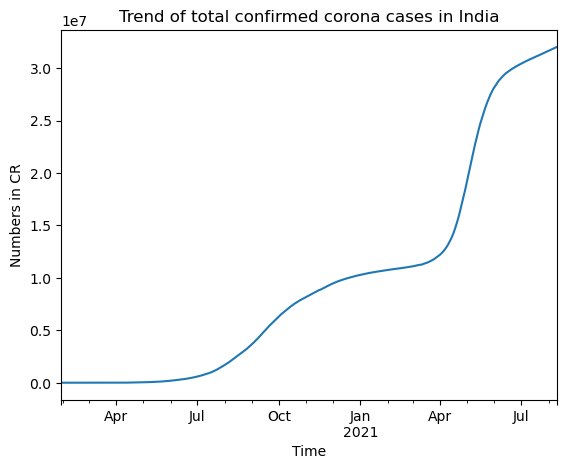

In [11]:
total_confirm_cases_date_wise.plot(title='Trend of total confirmed corona cases in India',
                                  xlabel='Time',
                                   ylabel='Numbers in CR'
                                  );  # in the scale of 1e7 -> 1cr

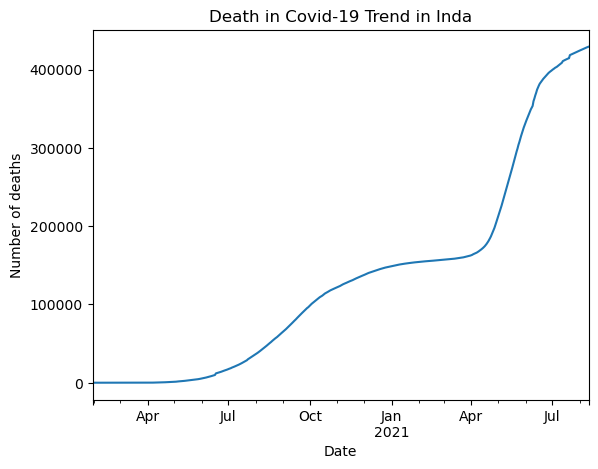

In [12]:
total_confirm_deaths_date_wise.plot(
    title='Death in Covid-19 Trend in Inda',
    ylabel='Number of deaths'
);

In [13]:
df[df['Date'] == '2021-08'].Confirmed.sum() # total cases in india in 2021-august -> 3.1 cr

31655824

### Q2. Death rate in India

In [14]:
total_case_and_deaths_india = df.groupby('Date')[['Confirmed', 'Deaths']].sum()

In [15]:
total_case_and_deaths_india['Death Rate'] = total_case_and_deaths_india['Deaths']/total_case_and_deaths_india['Confirmed']

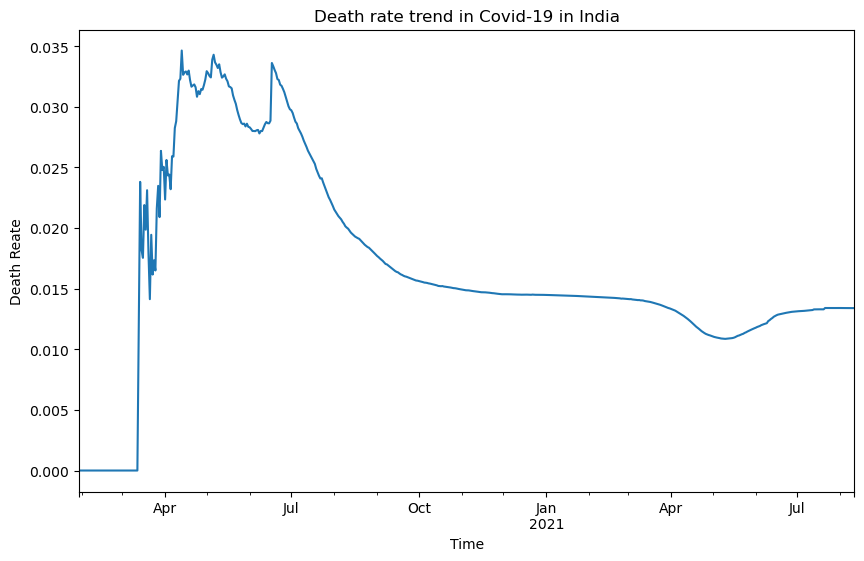

In [16]:
total_case_and_deaths_india['Death Rate'].plot(
    title='Death rate trend in Covid-19 in India',
    xlabel='Time',
    ylabel='Death Reate',
    figsize=(10,6)
);

In [17]:
total_case_and_deaths_india.describe()

,Confirmed,Deaths,Death Rate
count,5.600000e+02,560.000000,560.000000
mean,9.735141e+06,131051.794643,0.016674
std,1.018800e+07,127643.495163,0.008109
min,1.000000e+00,0.000000,0.000000
25%,3.637258e+05,12153.500000,0.013197
50%,8.338981e+06,123963.000000,0.014505
75%,1.174743e+07,160503.750000,0.020066
max,3.203651e+07,429179.000000,0.034645


In [18]:
### Median Death reate in India for Covid-19 ->>>>>> 0.0145   --- 1.45%

### Q3. Top 5 and last 5 states according to cases

In [19]:
df.head(3)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,year-month
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,2020-01
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,2020-01
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2020-02


#### Group by state and then sum all confirmed cases in different states seperately
#### Then convert them in to data frame to sort by descending order and convert affected numbers in Cr.

In [20]:
top_5_state_cases = pd.DataFrame(
    df.groupby('State/UnionTerritory')['Confirmed'].sum()
).Confirmed.sort_values(ascending=False)[:5]


In [21]:
top_5_state_cases = top_5_state_cases/10000000

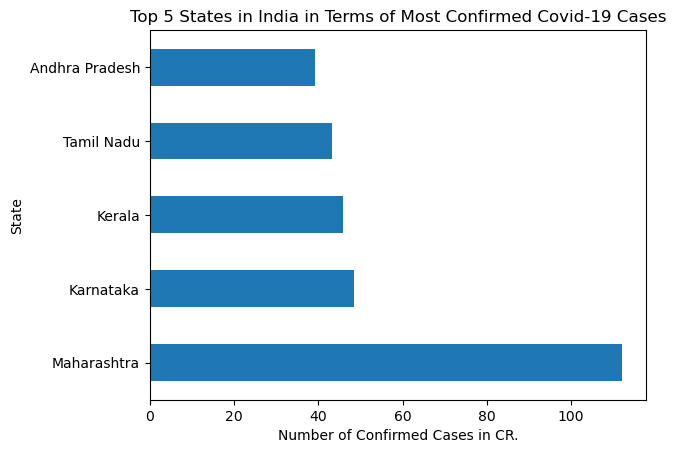

In [22]:
top_5_state_cases.plot(kind='barh',
                      ylabel='State',
                       xlabel='Number of Confirmed Cases in CR.',
                       title='Top 5 States in India in Terms of Most Confirmed Covid-19 Cases'
                      );

In [23]:
last_5_state_cases = pd.DataFrame(
    df.groupby('State/UnionTerritory')['Confirmed'].sum()
).Confirmed.sort_values(ascending=True)[:20]

#### Some cleaning stuff

In [24]:
last_5_state_cases = last_5_state_cases[
    ['Dadra and Nagar Haveli', 'Himanchal Pradesh', 'Madhya Pradesh***', 'Lakshadweep', 'Bihar****']
]

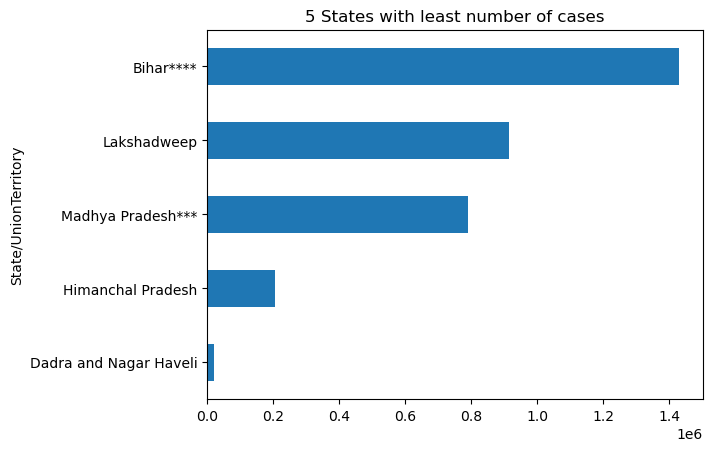

In [25]:
last_5_state_cases.plot(
    kind='barh',
    title='5 States with least number of cases',
    x='Number of cases (1e6 => 1 = 10 lakhs)',
    y='State/ Uniion Territory'
);

### Q4. States with most death rate

In [26]:
states_death_rate = df.groupby('State/UnionTerritory')[['Confirmed', 'Deaths']].sum()

#### Calculate death rate in a seperate col and add a col with median death rate of india

In [27]:
states_death_rate['Death Rate'] = states_death_rate['Deaths'] / states_death_rate['Confirmed']
states_death_rate["India's Median Death Rate"] = 0.0145

In [28]:
states_death_rate_top5 = states_death_rate.sort_values(by="Death Rate", ascending=False)
# states_death_rate_top5

In [29]:
states_death_rate_top5 = states_death_rate_top5.drop(index='Maharashtra***')[:10] ### cleaning some odd names

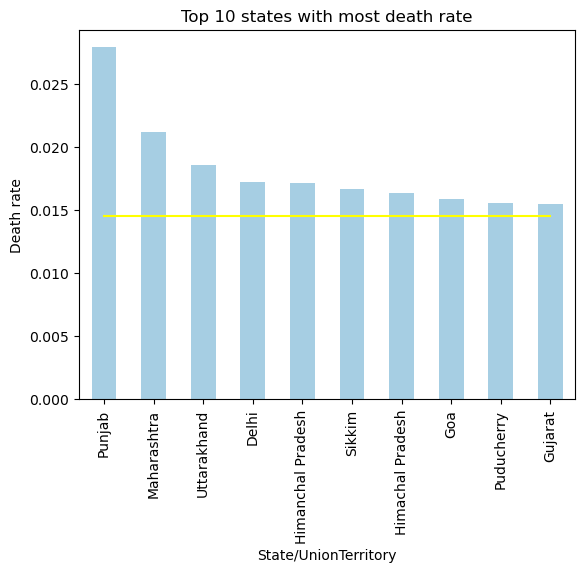

In [30]:
states_death_rate_top5['Death Rate'].plot(
    kind='bar',
    title='Top 10 states with most death rate',
    ylabel='Death rate',
    colormap='Paired',
    ax=states_death_rate_top5['India\'s Median Death Rate'].plot(
        color='yellow',
        label='Median'
    )
);

### Q5. Analysis month wise overall India's data

In [31]:
df.head(2)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,year-month
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,2020-01
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,2020-01


In [32]:
month_wise_df = df.groupby('year-month')[['Confirmed','Deaths']].sum()

In [33]:
month_wise_df

,Confirmed,Deaths
year-month,,
2020-01,2,0
2020-02,86,0
2020-03,9687,202
2020-04,422442,13270
2020-05,2938234,89834
2020-06,10558374,319690
2020-07,31726501,793511
2020-08,80749620,1553468
2020-09,149113758,2443374


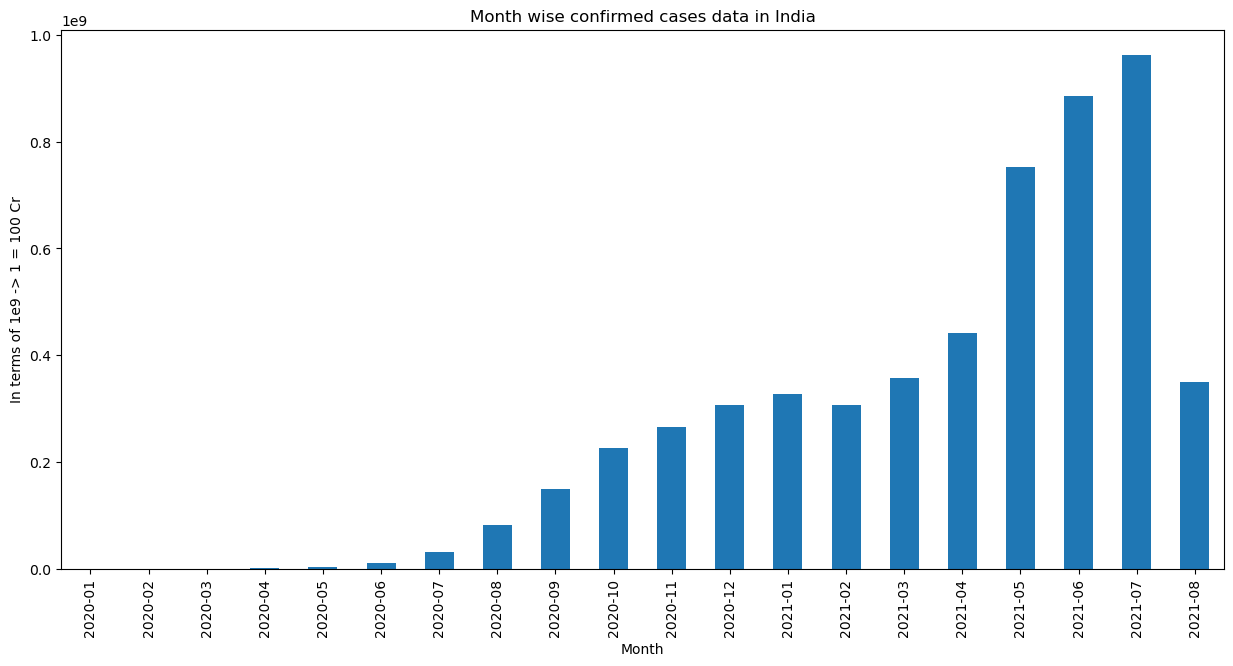

In [34]:
month_wise_df['Confirmed'].plot(
    kind='bar',
    figsize=(15,7),
    title='Month wise confirmed cases data in India',
    xlabel='Month',
    ylabel='In terms of 1e9 -> 1 = 100 Cr',
);

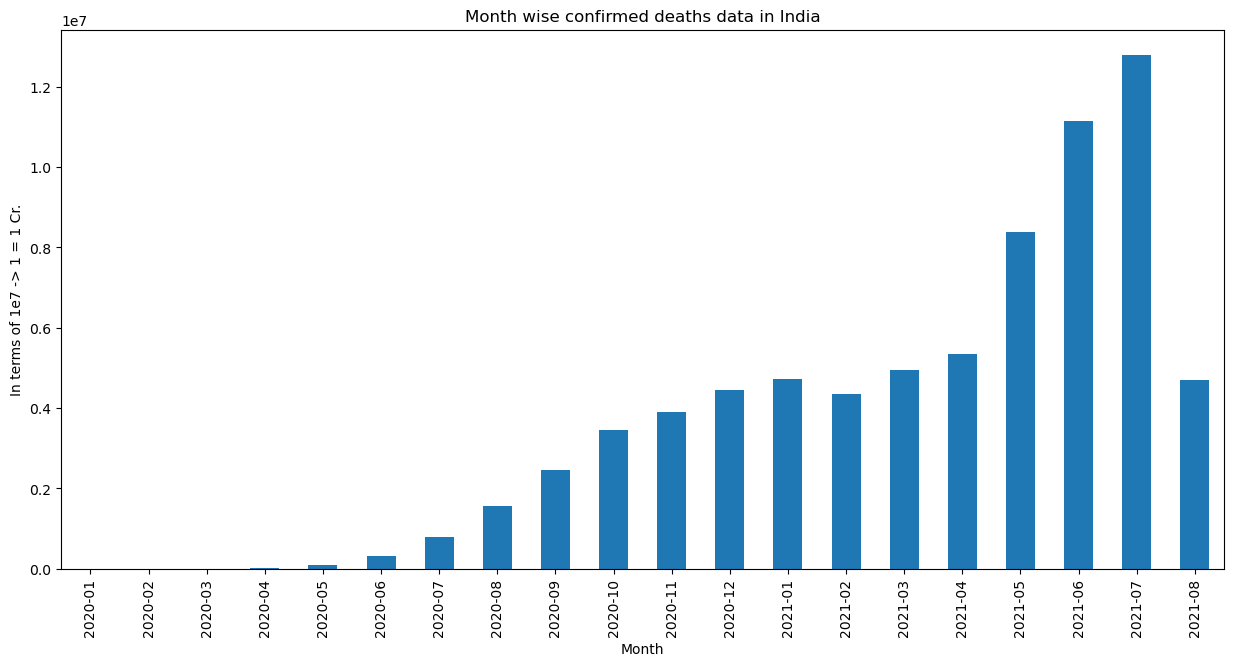

In [35]:
month_wise_df['Deaths'].plot(
    kind='bar',
    figsize=(15,7),
    title='Month wise confirmed deaths data in India',
    xlabel='Month',
    ylabel='In terms of 1e7 -> 1 = 1 Cr.',
);